<a href="https://colab.research.google.com/github/namantam1/ml-ai-dnn/blob/main/Tensoflow_Pipeline_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
train, test = tf.keras.datasets.fashion_mnist.load_data()

images, labels = train
# images = images/255.0
# display(images.shape, labels.shape, labels[:10])
labels = labels.astype(np.int32)
images = images.astype(np.float32)
display(images.shape, labels.shape, labels[:10])

4422102/4422102 [==============================] - 0s 0us/step


(60000, 28, 28)

(60000,)

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=int32)

In [ ]:
labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=int32)

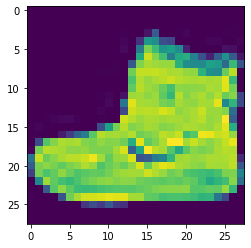

In [ ]:
plt.imshow(images[0])

In [ ]:
def normalize(image, label):
  return image/255.0, label

images, labels = train
labels = labels.astype(np.int32)
images = images.astype(np.float32)

# train = (images, labels)
fmnist_train_ds = tf.data.Dataset.from_tensor_slices((images, labels))\
  .map(normalize)\
  .shuffle(buffer_size=5000)\
  .cache()\
  .prefetch(buffer_size=tf.data.AUTOTUNE)\
  .batch(batch_size=1000) # same as batch_size in model.fit

images, labels = test
labels = labels.astype(np.int32)
images = images.astype(np.float32)

fmnist_test_ds = tf.data.Dataset.from_tensor_slices((images, labels))\
  .map(normalize)\
  .shuffle(buffer_size=5000)\
  .cache()\
  .prefetch(buffer_size=tf.data.AUTOTUNE)\
  .batch(batch_size=1000) # same as batch_size in model.fit

In [ ]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(units=10) # output labels count
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 5, 5, 64)         

In [ ]:
EPOCHS = 50
checkpoint_filepath = '/tmp/checkpoint'

# for saving best model
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)


model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

history = model.fit(
    fmnist_train_ds, 
    epochs=EPOCHS,
    validation_data=fmnist_test_ds,
    callbacks=[model_checkpoint_callback],
    # validation_split=0.2, // can't use tf dataset
    # batch_size=200 // useless incase of tensor dataset
)

# The model weights (that are considered the best) are loaded into the model.
model.load_weights(checkpoint_filepath)

Epoch 1/50
60/60 [==============================] - 2s 29ms/step - loss: 1.0382 - accuracy: 0.6242 - val_loss: 0.6299 - val_accuracy: 0.7629
Epoch 2/50
60/60 [==============================] - 2s 27ms/step - loss: 0.5871 - accuracy: 0.7786 - val_loss: 0.5152 - val_accuracy: 0.8070
Epoch 3/50
60/60 [==============================] - 2s 27ms/step - loss: 0.5046 - accuracy: 0.8117 - val_loss: 0.4552 - val_accuracy: 0.8308
Epoch 4/50
60/60 [==============================] - 2s 27ms/step - loss: 0.4561 - accuracy: 0.8313 - val_loss: 0.4221 - val_accuracy: 0.8473
Epoch 5/50
60/60 [==============================] - 2s 27ms/step - loss: 0.4214 - accuracy: 0.8443 - val_loss: 0.3941 - val_accuracy: 0.8581
Epoch 6/50
60/60 [==============================] - 2s 27ms/step - loss: 0.3932 - accuracy: 0.8560 - val_loss: 0.3734 - val_accuracy: 0.8683
Epoch 7/50
60/60 [==============================] - 2s 27ms/step - loss: 0.3706 - accuracy: 0.8638 - val_loss: 0.3534 - val_accuracy: 0.8735
Epoch 8/50
60

In [ ]:
model.load_weights(checkpoint_filepath)

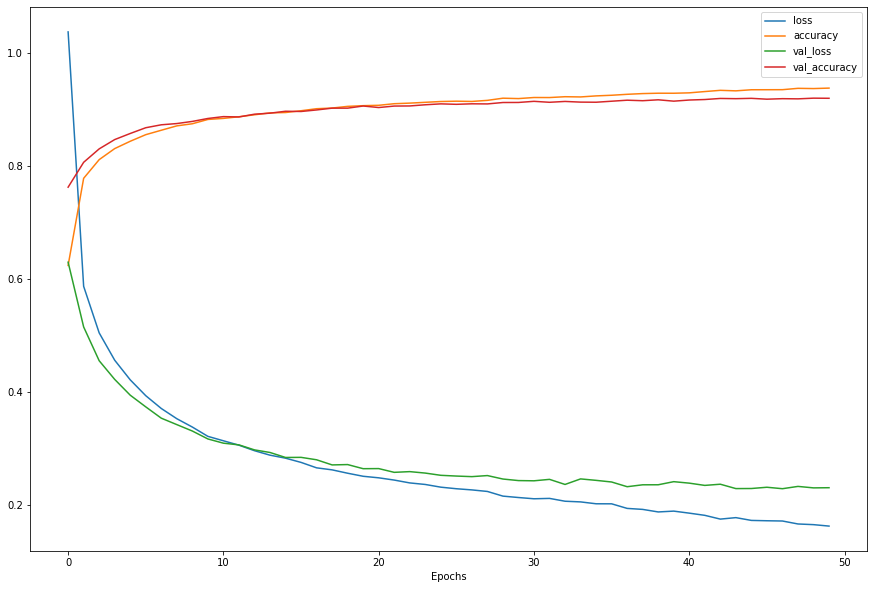

In [ ]:
# display(history.history)

# plt.plot(history.history["loss"])
# plt.plot(history.history["accuracy"])
# plt.plot(history.history.values())

res = pd.DataFrame(history.history).plot(
    figsize=(15,10)
)
plt.xlabel("Epochs")
plt.show()

In [ ]:
loss, accuracy = model.evaluate(fmnist_test_ds)
print("Loss :", loss)
print("Accuracy :", accuracy)
# model.predict(fmnist_train_ds)

10/10 [==============================] - 0s 16ms/step - loss: 0.2298 - accuracy: 0.9207
Loss : 0.22983580827713013
Accuracy : 0.9207000136375427


In [ ]:
images, labels = test
images = images / 255.0

labels_predicted = model.predict(images)

313/313 [==============================] - 1s 2ms/step


In [ ]:
res = model.predict(images)

res.shape

313/313 [==============================] - 1s 2ms/step


(10000, 10)

In [ ]:
# display(res[0], np.argmax(res[0]), labels[0])
labels_predicted = np.argmax(res, axis=1)

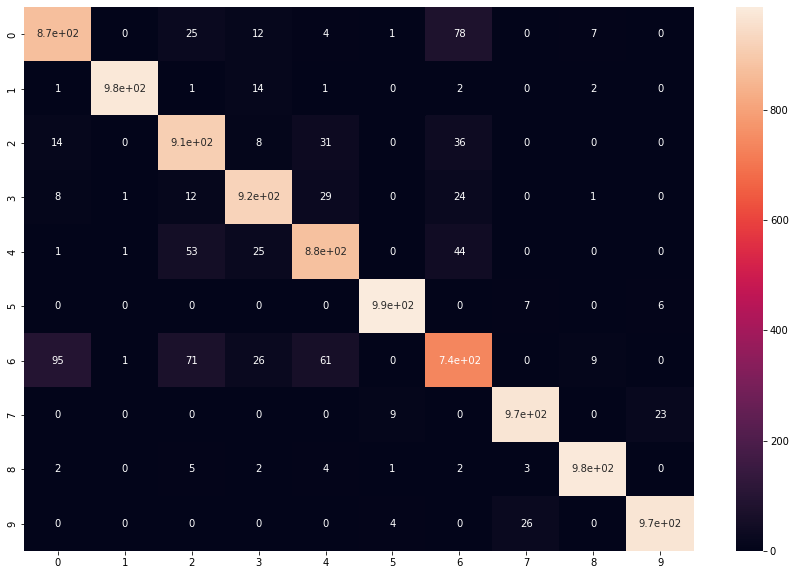

In [ ]:
# np.unique(labels).shape
cf = tf.math.confusion_matrix(labels, labels_predicted)

plt.figure(figsize=(15, 10))
sns.heatmap(cf, annot=True)